In [1]:
%matplotlib inline
# Written description of observable trends at the end of this notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how='outer', on='city')

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
tipos=["Rural", "Suburban", "Urban"]
colores=["gold","skyblue","coral"]

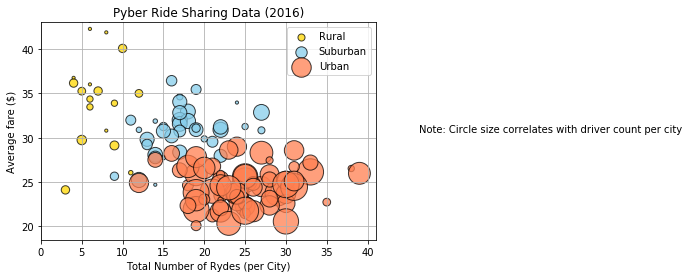

In [3]:
# loop to plot the x and y scatter for each city type
i=0

for tipo in tipos:
    pyber_df1=pyber_df[pyber_df['type'] == tipo]
    
    #grouping by city
    pyber_grouped = pyber_df1.groupby("city")

    #x-axis
    Total_rides = pyber_grouped["city"].count() 

    #y-axis
    Average_fare = pyber_grouped["fare"].mean() 

    #buble size
    buble= 10*pyber_grouped["driver_count"].mean()

    plt.scatter(Total_rides, Average_fare, marker="o", facecolors=colores[i], edgecolors="black",
            s=buble, alpha=0.75)
    i=i+1

# Incorporate the other graph properties
plt.ylim(18.5, 43)
plt.xlim(0, 41)
plt.grid()

plt.xlabel("Total Number of Rydes (per City)")
plt.ylabel("Average fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
#plt.legend(handles=[ Urban, Suburban, Rural], loc= "upper rigth")
plt.legend(tipos, loc="upper right")


# Incorporate a text label regarding circle size
plt.figtext(1, 0.5, "Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig("city_rides.png")

# Prints the scatter plot to the screen
plt.show()

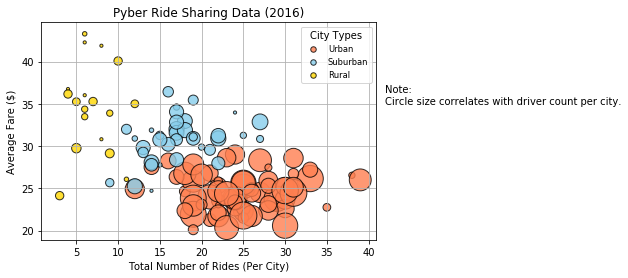

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [4]:
# Calculate Type Percents
share_fare_df = pyber_df.groupby("type").sum()
total_fare = pyber_df["fare"].sum()
percentages_f = 100*share_fare_df["fare"]/total_fare


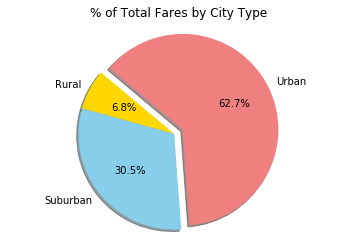

In [5]:
# Build Pie Chart
colors = ["gold","skyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(percentages_f, explode=explode, labels=tipos, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("FaresPies.png")
plt.show()

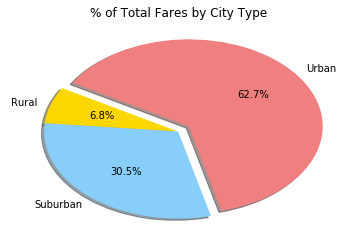

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [6]:
# Calculate Ride Percents
share_rides_df = pyber_df.groupby("type").count()
total_rides = pyber_df["city"].count()
percentages_r = 100*share_rides_df["city"]/total_rides

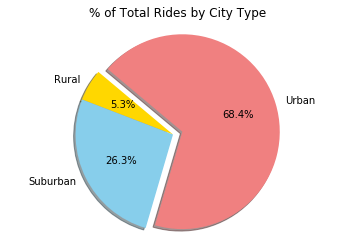

In [7]:
# Build Pie Chart
plt.pie(percentages_r, explode=explode, labels=tipos, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("RidesPies.png")
plt.show()

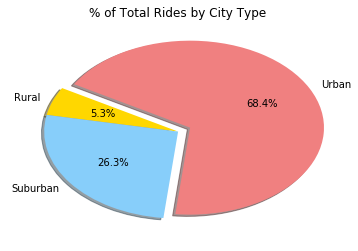

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [8]:
# Calculate Driver Percents
share_drivers_df = city_df.groupby("type").sum()
total_drivers = city_df["driver_count"].sum()
percentages_d = 100*share_drivers_df["driver_count"]/total_drivers

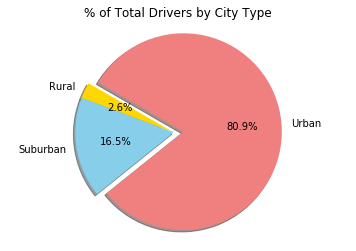

In [9]:
# Build Pie Chart
plt.pie(percentages_d, explode=explode, labels=tipos, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("DriversPies.png")
plt.show()

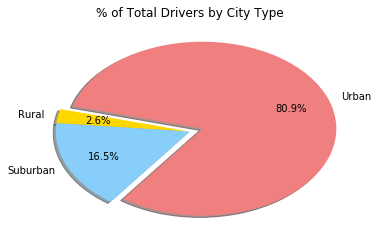

# Include a written description of three observable trends based on the data.

1) Total number of rides and avergage fares are negatively correlated. This is true in the whole data and when considering only data on Urban, Suburban or Rural rides. This evidence is consistent with "the Law of the Demand" which predicts an increase in the quantity demanded as fares go down.

2) Urban Areas show highest activity measured by different variables suchs as the number of rides or number of drivers. By contras Rural areas present the smallest activity measured by this variables.

3) On average, a ride is more expensive in an Urban City.